<a href="https://colab.research.google.com/github/rabastos44/Bootcamp-Data-Science-Alura/blob/master/Ricardo_Bastos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.dates as mdates
import numpy as np

## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

### Estrutura da base de dados

- Mostrando os dados e formatos dos dados
- Fazendo limpeza e prepação inicia nos dados  

Carregando base de casos de Covid-19 Fonte: https://brasil.io/dataset/covid19/caso/

---  Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
- 0   date                            data da coleta yyyy-mm-dd
- 1   state                           sigla da unidade federativa, exemplo: SP
- 2   city                            nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).
- 3   place_type                      tipo de local que esse registro descreve, pode ser city ou state.
- 4   confirmed                       número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.
- 5   deaths                          número de mortes
- 6   order_for_place                 tipo de local que esse registro descreve, pode ser city ou state.
- 7   is_last                         campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).
- 8   estimated_population_2019       população estimada para esse município/estado em 2019, segundo o IBGE. ATENÇÃO: essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.
- 9   estimated_population            população estimada para esse município/estado em 2020, segundo o IBGE. (acesse o script que faz o download e conversão dos dados de população).
- 10  city_ibge_code                  código IBGE do local.
- 11  confirmed_per_100k_inhabitants  número de casos confirmados por 100.000 habitantes (baseado em estimated_population).
- 12  death_rate                      taxa de mortalidade (mortes / confirmados).

In [2]:
data_raw = pd.read_csv('/content/drive/My Drive/Boot Camp Alura/caso.csv')

In [3]:
data_raw.columns 

Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths',
       'order_for_place', 'is_last', 'estimated_population_2019',
       'estimated_population', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate'],
      dtype='object')

In [4]:
data = data_raw[[ 'state', 'city', 'place_type', 'confirmed', 'deaths',
       'order_for_place', 'is_last', 'estimated_population_2019',
       'estimated_population', 
       'confirmed_per_100k_inhabitants', 'death_rate']]
data.insert(0,'date',pd.to_datetime(data_raw.date))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950679 entries, 0 to 950678
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            950679 non-null  datetime64[ns]
 1   state                           950679 non-null  object        
 2   city                            944245 non-null  object        
 3   place_type                      950679 non-null  object        
 4   confirmed                       950679 non-null  int64         
 5   deaths                          950679 non-null  int64         
 6   order_for_place                 950679 non-null  int64         
 7   is_last                         950679 non-null  bool          
 8   estimated_population_2019       946976 non-null  float64       
 9   estimated_population            946976 non-null  float64       
 10  confirmed_per_100k_inhabitants  933529 non-null  float64

### Explorando os Casos de covide por uma visão Nacional e Regiões

In [6]:
# Filtrando e preparando os dados para as visualizações, visão nacional 

data_states = data[data.place_type=='state']
cases_states = data_states.pivot(index='date',columns='state',values=['confirmed','deaths','confirmed_per_100k_inhabitants'])
cases_states.loc['2020-02-25'].fillna(0,inplace=True)
cases_states.fillna(method="ffill",axis=0,inplace=True)
daily_cases_states = cases_states.diff(1)

cases_national = pd.DataFrame()
cases_national['confirmed'] = daily_cases_states['confirmed'].sum(axis=1)
cases_national['deaths'] = daily_cases_states['deaths'].sum(axis=1)
mmean_cases_national = cases_national.rolling(7).mean()

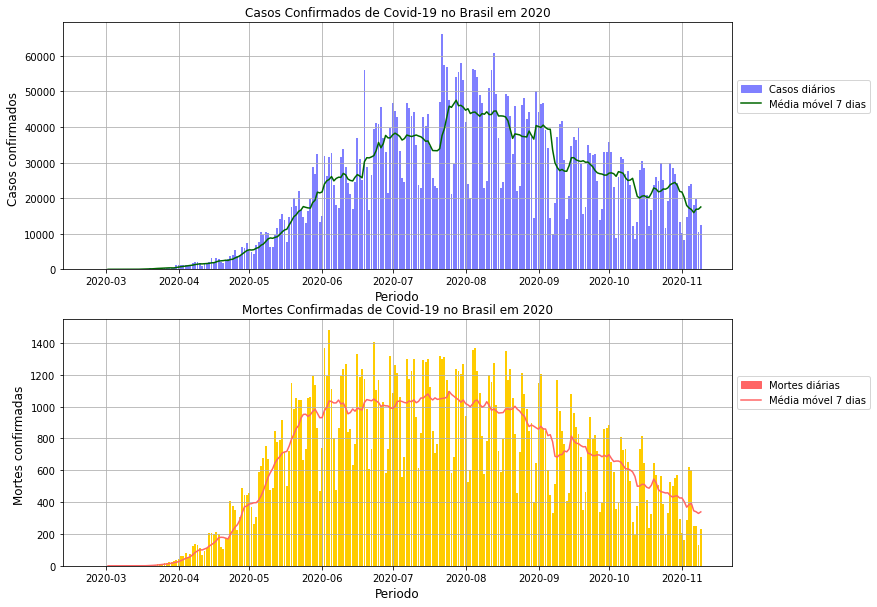

In [7]:
# Gráficos
fig, axis = plt.subplots(2, 1)
fig.set_size_inches((12,10))

# Número de casos
# Formatação do gráfico
axis[0].set_title('Casos Confirmados de Covid-19 no Brasil em 2020')
axis[0].grid(axis='both')
axis[0].set_xlabel('Periodo',fontdict={'fontsize':12})
axis[0].set_ylabel('Casos confirmados ',fontdict={'fontsize':12})
# Incluindo dados
axis[0].bar(cases_national['confirmed'].index,cases_national['confirmed'].values, color=(.5,.5,1))
leg2, = axis[0].plot(mmean_cases_national['confirmed'].index, mmean_cases_national['confirmed'].values, color=(0,.4,0))

# Adicionando legenda 
leg1 = mpatches.Patch(color=(.5,.5,1))
axis[0].legend([leg1,leg2],["Casos diários", 'Média móvel 7 dias'], loc='center left', bbox_to_anchor=(1,.7))

# Número de mortes
# Formatação do gráfico
axis[1].set_title('Mortes Confirmadas de Covid-19 no Brasil em 2020')
axis[1].grid(axis='both')
axis[1].set_xlabel('Periodo',fontdict={'fontsize':12})
axis[1].set_ylabel('Mortes confirmadas ',fontdict={'fontsize':12})
# Incluindo dados
axis[1].bar(cases_national['deaths'].index,cases_national['deaths'].values,  color=(1,.8,0))
leg2, = axis[1].plot(mmean_cases_national['deaths'].index, mmean_cases_national['deaths'].values,color=(1,.4,.4))

# Adicionando legenda 
leg1 = mpatches.Patch(color=(1,.4,.4))
axis[1].legend([leg1,leg2],["Mortes diárias", 'Média móvel 7 dias'], loc='center left', bbox_to_anchor=(1,.7))

plt.show()

Analisando o ambito Nacional e comparando mortes com casos observamos os seguintes pontos:
- O número de casos sobe até 07/2020 quando por 2 semanas eles estabelizam e voltam a subir até atingir o pico em agosto;
- temos uma queda no número de casos no final de 07/2020 por falta de testes
https://www.cnnbrasil.com.br/saude/2020/07/30/ministerio-da-saude-tem-9-8-milhoes-de-testes-parados-por-falta-de-insumos; 
- O número de mortes sobe mais rapidamente até 06/2020 ficando estável em mais de 1000 mortes por dia até o final de 08/2020 quando começamos a ver uma tendencia de queda;


In [8]:
def mediamovel_por_regiao(base):
  regioes = pd.DataFrame()
  regioes['Norte'] = base[['AC','AM','RO','TO','RR','PA','AP']].sum(axis=1).rolling(7).mean()
  regioes['Nordeste'] = base[['AL','BA','CE','MA','PB','PE','PI','RN','PI']].sum(axis=1).rolling(7).mean()
  regioes['Sul'] = base[['PR','RS','SC']].sum(axis=1).rolling(7).mean()
  regioes['Sudeste'] = base[['ES','MG','RJ','SP']].sum(axis=1).rolling(7).mean()
  regioes['Centro-Oeste'] = base[['GO','MT','MS']].sum(axis=1).rolling(7).mean()
  return regioes

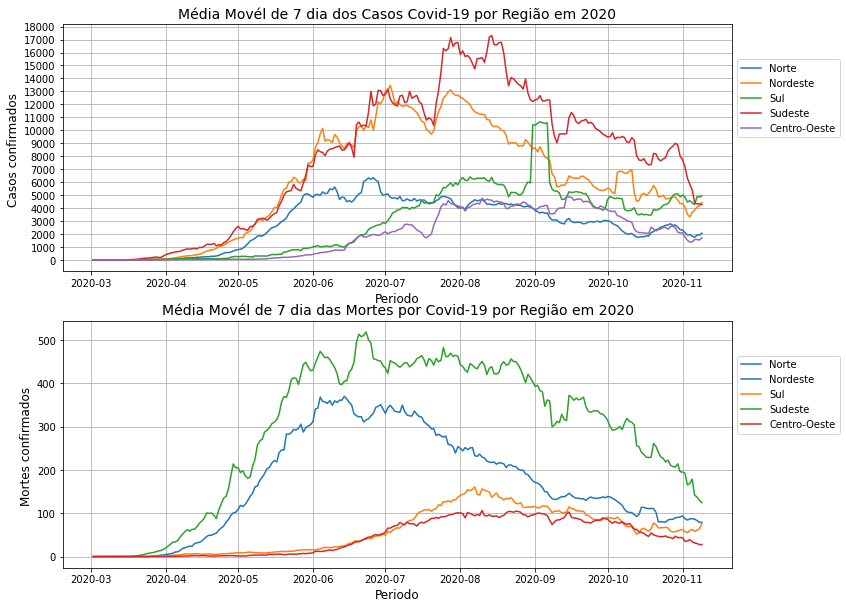

In [9]:
# Filtrando e preparando os dados para as visualizações, visão por Região
mm_confirmed_states = mediamovel_por_regiao(daily_cases_states['confirmed'])
mm_deaths_states = mediamovel_por_regiao(daily_cases_states['deaths'])

# Gráficos
fig, axis = plt.subplots(2, 1)
fig.set_size_inches((12,10))

# Formatação do gráfico
axis[0].grid(axis='both')
axis[0].set_xlabel('Periodo',fontdict={'fontsize':12})
axis[0].set_ylabel('Casos confirmados ',fontdict={'fontsize':12})
axis[0].set_title('Média Movél de 7 dia dos Casos Covid-19 por Região em 2020',fontdict={'fontsize':14})
axis[0].set_yticks(np.arange(0, 20000, 1000 ))
plt.set_cmap(cm.Dark2)

# Incluindo dados
legN, = axis[0].plot(mm_confirmed_states['Norte'].index, mm_confirmed_states['Norte'].values,)
legNE, = axis[0].plot( mm_confirmed_states['Nordeste'].index,  mm_confirmed_states['Nordeste'].values)
legS, = axis[0].plot( mm_confirmed_states['Sul'].index,  mm_confirmed_states['Sul'].values)
legSE, = axis[0].plot( mm_confirmed_states['Sudeste'].index,  mm_confirmed_states['Sudeste'].values)
legCO, = axis[0].plot( mm_confirmed_states['Centro-Oeste'].index,  mm_confirmed_states['Centro-Oeste'].values)

# Adicionando legenda 
axis[0].legend([legN,legNE,legS,legSE,legCO],['Norte','Nordeste','Sul','Sudeste','Centro-Oeste'], loc='center left', bbox_to_anchor=(1,.7))

# Formatação do gráfico
axis[1].grid(axis='both')
axis[1].set_xlabel('Periodo',fontdict={'fontsize':12})
axis[1].set_ylabel('Mortes confirmados ',fontdict={'fontsize':12})
axis[1].set_title('Média Movél de 7 dia das Mortes por Covid-19 por Região em 2020',fontdict={'fontsize':14})
axis[1].set_yticks(np.arange(0, 800, 100))
plt.set_cmap(cm.Dark2)

# Incluindo dadoslegN, = axis[0].plot(mm_confirmed_states['Norte'].index, mm_confirmed_states['Norte'].values,)
legNE, = axis[1].plot( mm_deaths_states['Nordeste'].index,  mm_deaths_states['Nordeste'].values)
legS, = axis[1].plot( mm_deaths_states['Sul'].index,  mm_deaths_states['Sul'].values)
legSE, = axis[1].plot( mm_deaths_states['Sudeste'].index,  mm_deaths_states['Sudeste'].values)
legCO, = axis[1].plot( mm_deaths_states['Centro-Oeste'].index,  mm_deaths_states['Centro-Oeste'].values)

# Adicionando legenda 
axis[1].legend([legN,legNE,legS,legSE,legCO],['Norte','Nordeste','Sul','Sudeste','Centro-Oeste'], loc='center left', bbox_to_anchor=(1,.7))
plt.show()


Existems diferenças claras nas médias móveis das regiões. Podemos notar que o crescimento nas regiões Sudeste, Nordeste e Norte atingindo milhares de casos confirmados ao final de Abril. As regiões Centro-Oeste e Sul vemos um crescimento mais lento.  Podemos observar alguns comportamentos estranhos:
- no Sul existe um aumento repentino no final de 09-2020;
- podemos notar o vale que ocorre no meio de 07-2020, mais claramente e ocorre em todas as regiões;
- a curva de mortes também possui a mesma diferença entre as regiões;
- o plato na curva de mortes é na verdade um aumento nos estados do Sul e Centro Oeste e uma redução nas regiões do Sudeste, Nordeste e Norte;

Vamos observar mais de perto 

# Analise das curvas dos Estados

Vamos analisar as médias movéis dos estados, 

In [10]:
# Função que permite imprimir diversas linhas de um recorte de um DataFrame
# usando as colunas como nome da legenda
# 
# params: figure : Axes 
#         data : DataFrame  

def plota_leg(figure, data):
  for data in data.iteritems():
    figure.plot(data[1],label=data[0])

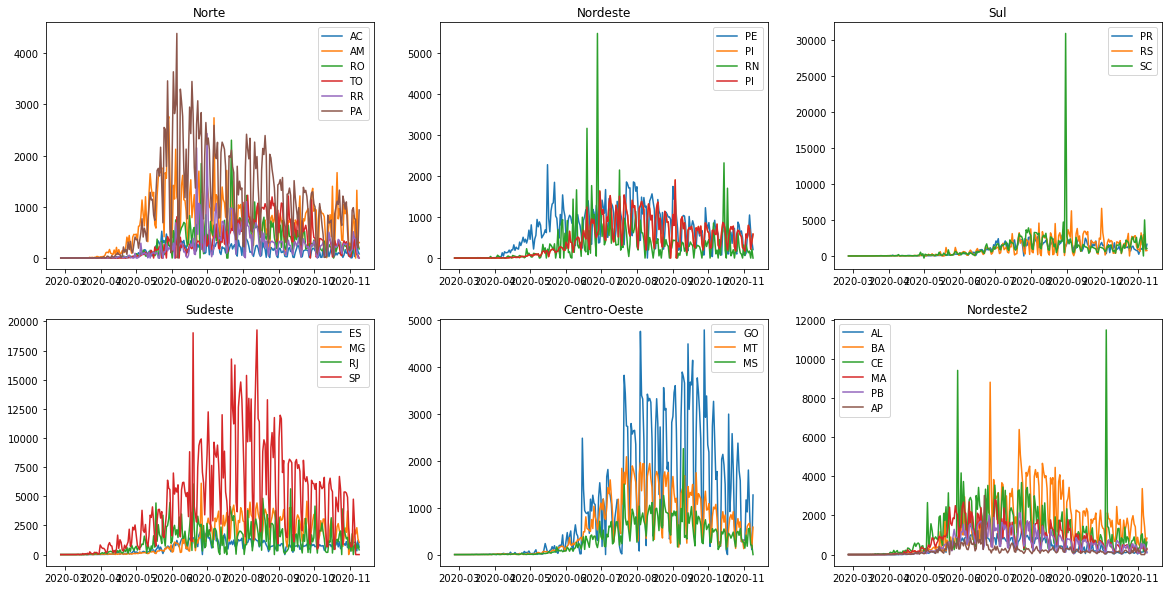

In [11]:
fig, axis = plt.subplots(2, 3)
fig.set_size_inches(20,10)

plota_leg(axis[0][0],daily_cases_states.confirmed[['AC','AM','RO','TO','RR','PA']])
plota_leg(axis[0][1],daily_cases_states.confirmed[['PE','PI','RN','PI']])
plota_leg(axis[0][2],daily_cases_states.confirmed[['PR','RS','SC']])
plota_leg(axis[1][0],daily_cases_states.confirmed[['ES','MG','RJ','SP']])
plota_leg(axis[1][1],daily_cases_states.confirmed[['GO','MT','MS']])
plota_leg(axis[1][2],daily_cases_states.confirmed[['AL','BA','CE','MA','PB','AP']])

axis[0][0].set_title('Norte')
axis[0][1].set_title('Nordeste')
axis[0][2].set_title('Sul')
axis[1][0].set_title('Sudeste')
axis[1][1].set_title('Centro-Oeste')
axis[1][2].set_title('Nordeste2')

for i in axis:
  for j in i:
    j.legend()

plt.show()

Com a segmentações por estado podemos observar que temos algumas entradas que são muito maiores, vamos analisar esses ponto para tentar entender o que ocorre nos estados de **RN, SC, SP, GO, CE e BA**. 

Algumas hipoteses para investigar esses picos
- Alguma inserção de dados atrasada 
- Uma cidade nova na base
- Alguma mudança no comportamento que aumentou o contagio

Escolhendo **CE** para começar a analise:

In [12]:
# invertendo a ordem das colunas para facilitar a visualização
daily_cases_states2 = daily_cases_states.T.reset_index()
daily_cases_states2.set_index(['state','level_0'],inplace=True)
daily_cases_states2.loc['CE'].T.sort_values('confirmed', ascending = False).head()

level_0,confirmed,deaths,confirmed_per_100k_inhabitants
date,,,
2020-10-05 00:00:00,11497.0,13.0,125.14282
2020-05-30 00:00:00,9427.0,97.0,102.61124
2020-06-02 00:00:00,4179.0,316.0,45.48768
2020-06-04 00:00:00,3739.0,208.0,40.69836
2020-07-24 00:00:00,3688.0,45.0,40.14323


Temos 2 grandes picos em 05-10-2020" e em 30-05-2020 com os valores de 11.497 e 9.457 novos casos. 
Investigaremos os 3 casos para tentar explicar esses picos 

- O pico de 30-05-2020 foi realizados mais de 20 mil testes
  https://g1.globo.com/ce/ceara/noticia/2020/05/30/casos-covid-19-no-ceara-em-30-de-maio.ghtml
- O pico de 05-10-2020 ouve um grande liberação de exames atrasados 
  https://www.opovo.com.br/coronavirus/2020/10/05/coronavirus-no-ceara-mortes-casos-confirmados-covid-19-5-outubro-5-10.html
